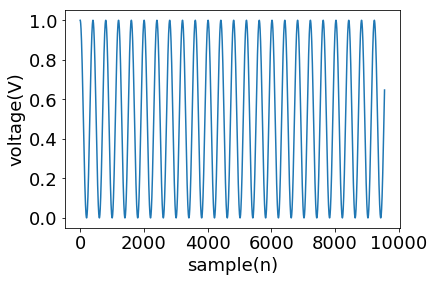

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import matplotlib
Fs = 9550
f = 23.8
sample = 9550
x = np.arange(sample)
newTrain = (np.cos(2 * np.pi * f * x / Fs)+1)/2
plt.plot(x, newTrain)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

In [4]:
import csv
output_array = np.array(y)
np.savetxt("sliced_yTrainREWORKED.csv", output_array, delimiter=",")

NameError: name 'y' is not defined

In [5]:

matplotlib.rcParams.update({'font.size': 18})
# Importing the dataset
N = 8000
dataset = pd.read_csv('sliced_LEFT_RIGHT_9550.csv')
#y = pd.read_csv('sliced_yTrain.csv').values[250:]
trainY = newTrain[260:]
test = pd.read_csv('TEST.csv').values
emg = dataset.values[:N]

(7960, 8)


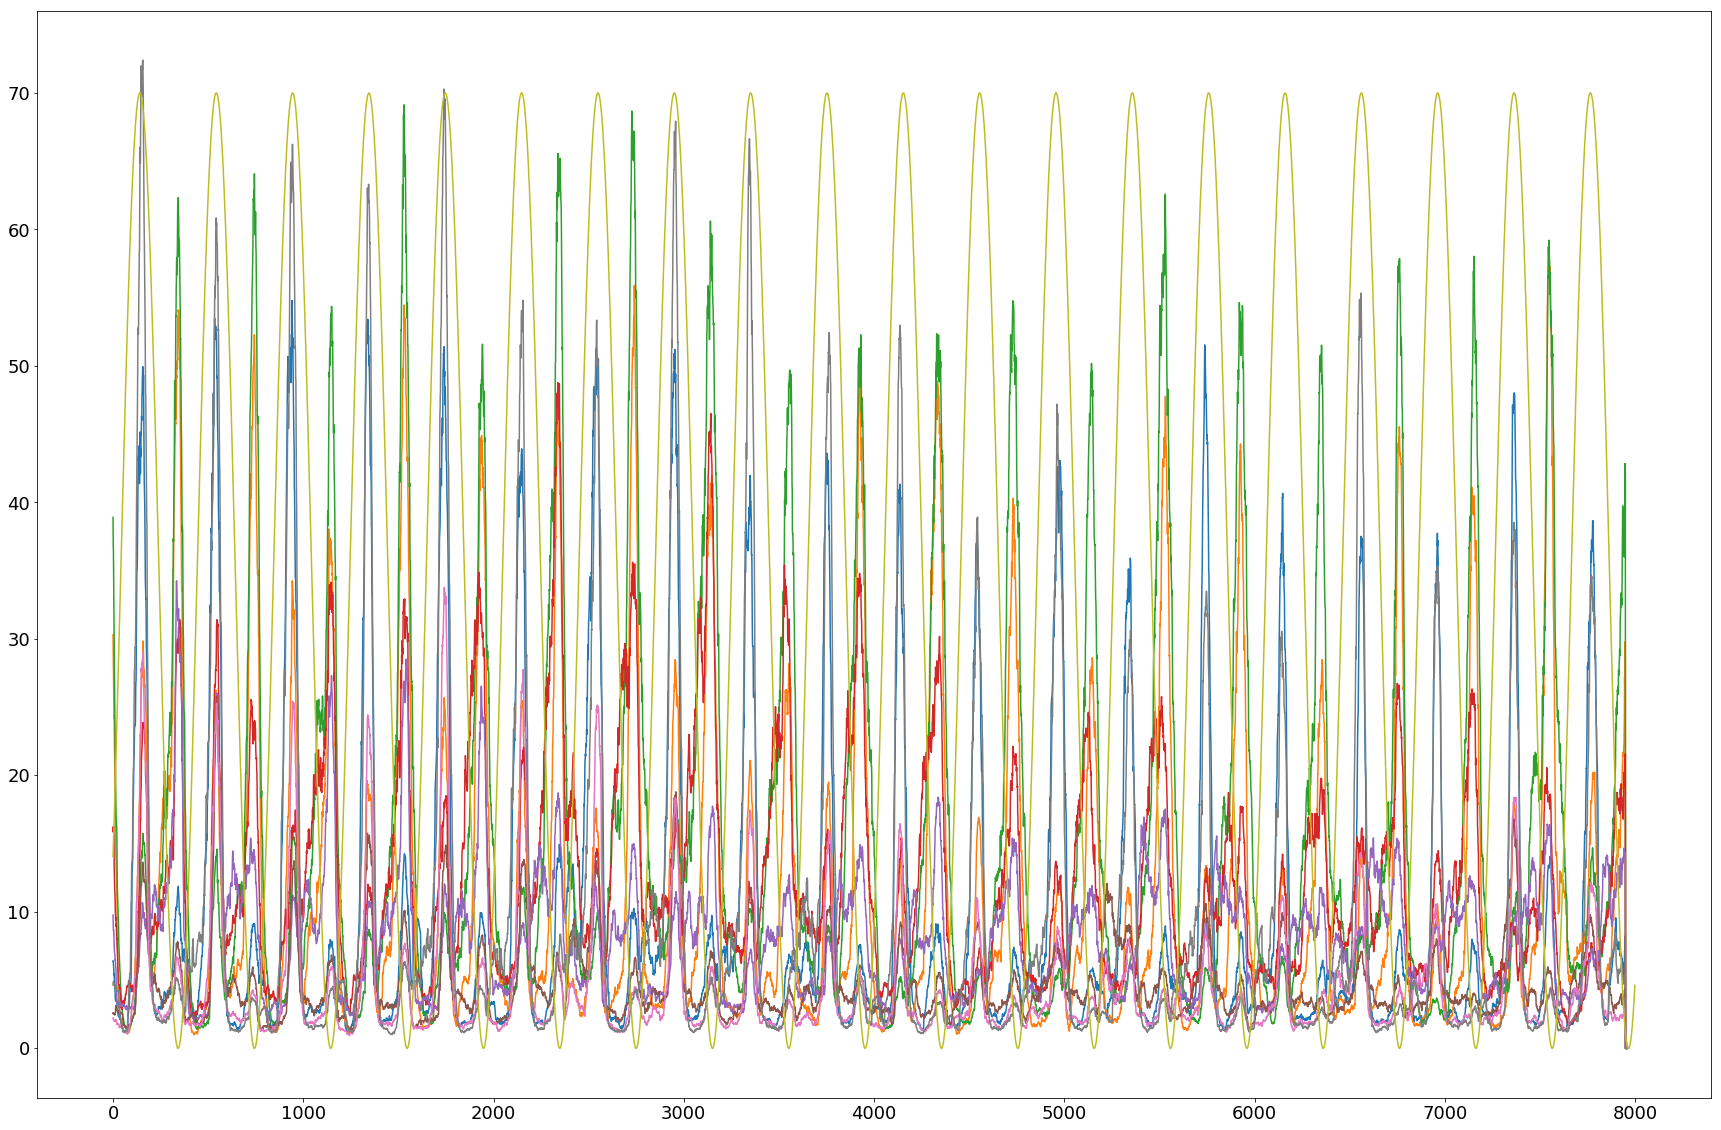

In [59]:
wind_size = 40
i_start = range(1, N-wind_size)
i_stop = range(wind_size, N)
EMG_av = np.zeros((N-wind_size,8))
for i in range(N-10-wind_size):
    sample = np.mean(emg[i_start[i]:i_stop[i],:],axis=0)
    EMG_av[i,:] = sample
    
print(EMG_av.shape)
plt.figure(figsize=(30,20))
plt.plot(EMG_av)
plt.plot(trainY[:N]*70)
plt.show()


In [98]:
def sigmoid(x):
    return (1.0 / (1.0 + np.exp(-0.2*x)))

In [55]:
from sklearn.kernel_ridge import KernelRidge
from math import pi,sin
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared
param_grid = {"alpha": 1.0, "gamma": [0.1, 0.01],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}
print(N)
kr = KernelRidge(kernel='linear', gamma=0.1)
trainX = EMG_av.flatten().reshape(-1, 1)
trainY = np.repeat(y, 8)[:len(trainX)]
testX = EMG_av.flatten().reshape(-1, 1)[5000:5000+len(trainX)]
kr.fit(trainX, trainY)
pred = kr.predict(testX)
plt.plot(trainY)
plt.plot(pred)
plt.show()
import pickle
# save the model to disk
filename = 'krr.sav'
pickle.dump(kr, open(filename, 'wb'))

8000


MemoryError: 

In [7]:
trainX = dataset.values[:4000]
trainY = newTrain[260:4260]
testX = dataset.values[4000:8000]


In [8]:
X = dataset.values

(7960, 8)


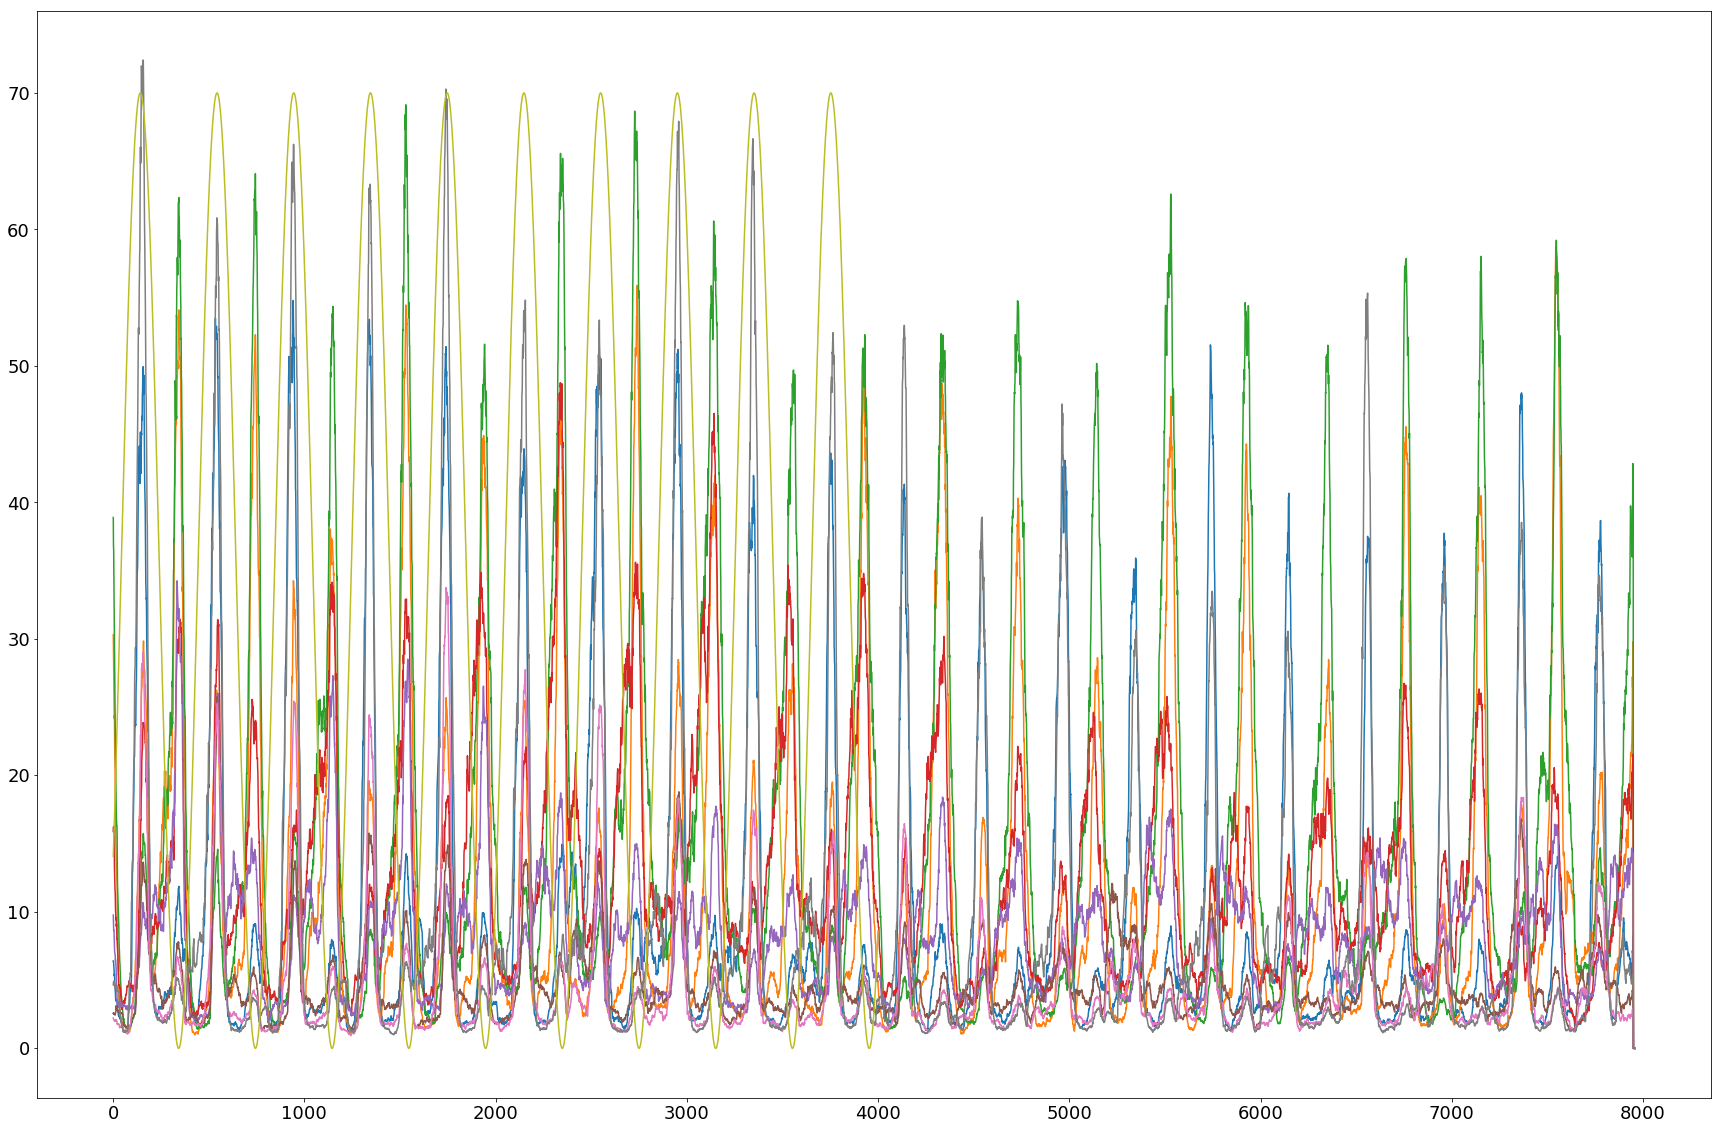

In [9]:
wind_size = 40
i_start = range(1, N-wind_size)
i_stop = range(wind_size, N)
EMG_av = np.zeros((N-wind_size,8))
for i in range(N-10-wind_size):
    sample = np.mean(X[i_start[i]:i_stop[i],:],axis=0)
    EMG_av[i,:] = sample
    
print(EMG_av.shape)
plt.figure(figsize=(30,20))
plt.plot(EMG_av)
plt.plot(trainY[:N]*70)
plt.show()


In [10]:
trainX = EMG_av[:4000]
trainY = newTrain[260:4260]
testX = EMG_av[4000:7000]

In [11]:
print(trainX.shape)
print(testX.shape)
import math

(4000, 8)
(3000, 8)


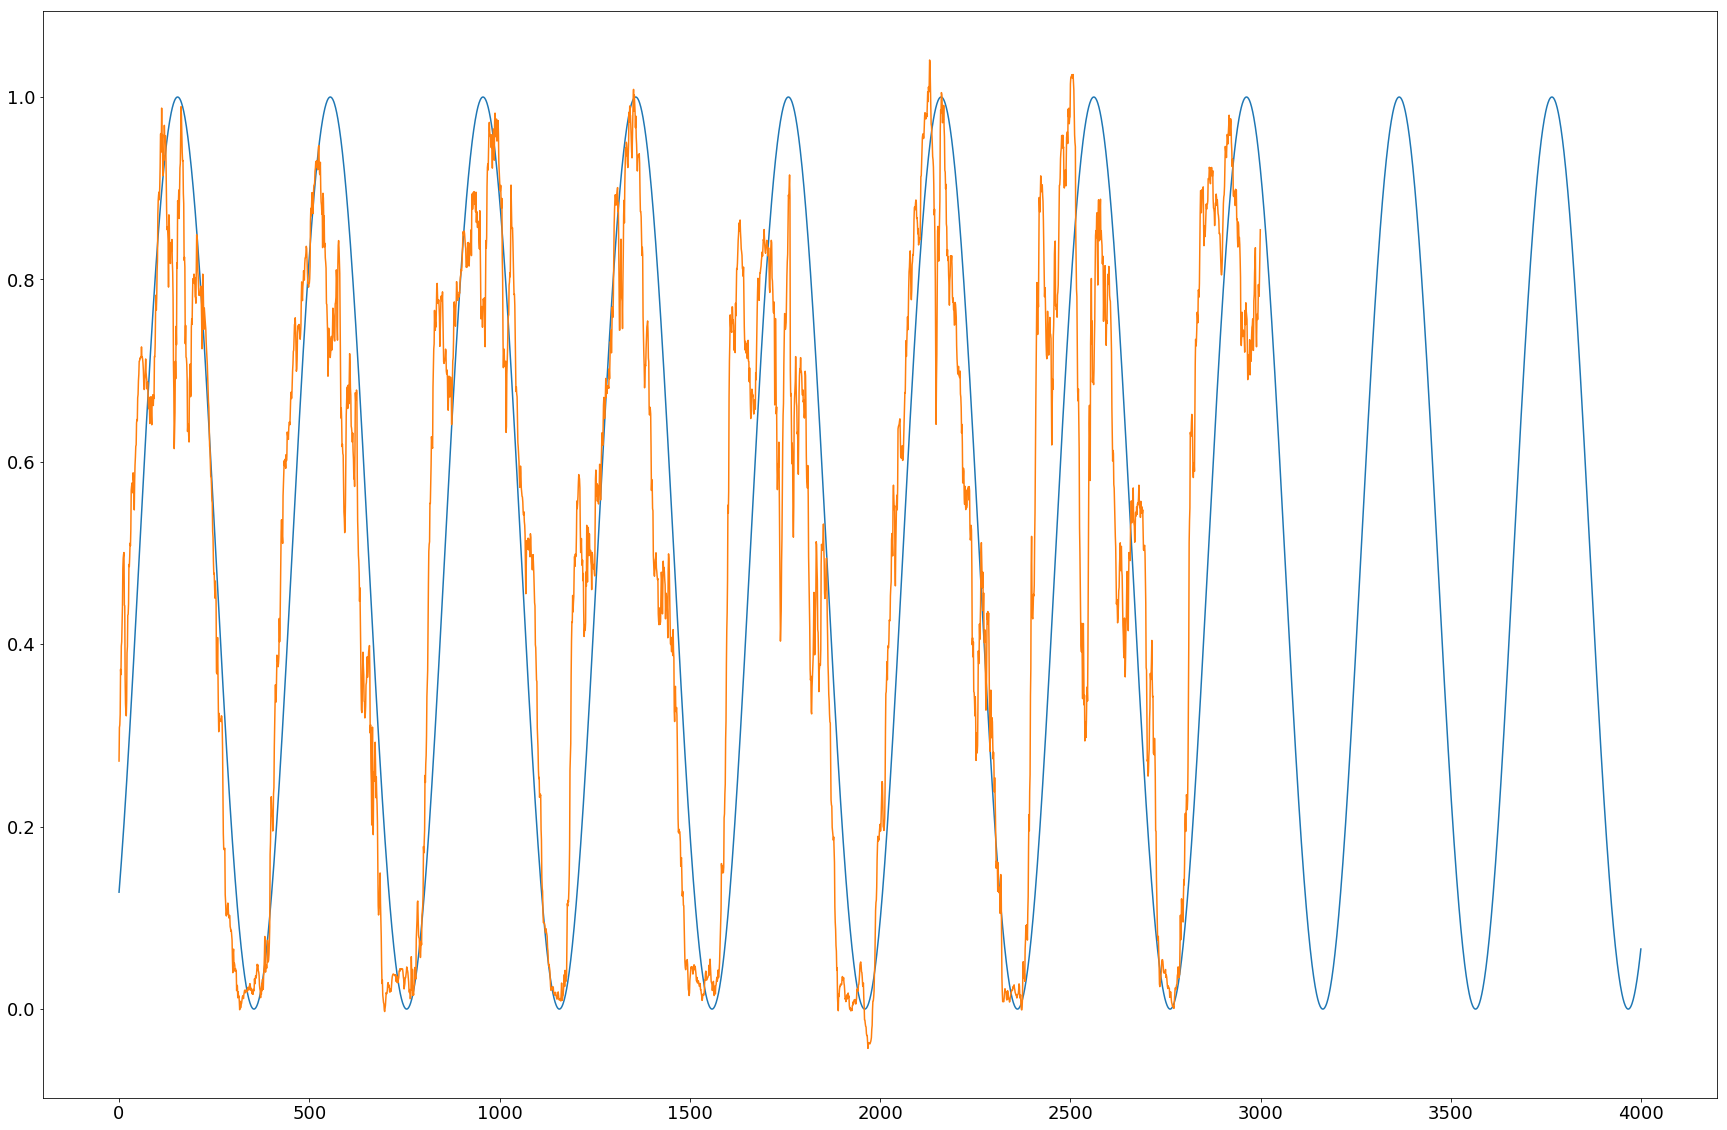

In [14]:
from sklearn.kernel_ridge import KernelRidge
kr = KernelRidge(kernel='rbf', gamma=0.01)
kr.fit(trainX, trainY)
pred = kr.predict(testX)

plt.figure(figsize=(30,20))
#plt.plot(trainX)
plt.plot(newTrain[4260:8260])
plt.plot(pred)
plt.show()

In [17]:
import pickle
# save the model to disk
filename = 'rbf.sav'
pickle.dump(kr, open(filename, 'wb'))

In [119]:
import pickle
# save the model to disk
filename = 'rbf2.sav'
pickle.dump(pred, open(filename, 'wb'),protocol = 2)